In [83]:
import numpy as np
import pandas as pd

data_train = pd.read_csv("train.csv")

In [84]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 35 columns):
Station                               319 non-null object
Season                                319 non-null int64
County                                319 non-null object
Location                              319 non-null object
Lat                                   319 non-null float64
Lon                                   319 non-null float64
縣市                                    319 non-null int64
海岸段                                   319 non-null int64
Region                                319 non-null int64
Seat                                  319 non-null int64
Shore shape                           319 non-null int64
Substrate type                        319 non-null int64
1暴露岩岸                                 243 non-null float64
2暴露人造結構物                              243 non-null float64
3暴露岩盤                                 243 non-null float64
4沙灘                        

In [85]:
data_train.describe()

,Season,Lat,Lon,縣市,海岸段,Region,Seat,Shore shape,Substrate type,1暴露岩岸,...,Foam material,Float,Fishing nets and ropes,Fishing equipment,Cigarette and lighter,Glass jar,Metal,Paper,Others,LEVEL
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,243.000000,...,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,2.504702,23.682838,120.951790,10.373041,3.416928,3.090909,5.278997,1.648903,4.238245,0.069959,...,0.457680,0.178683,0.401254,0.009404,0.003135,0.103448,0.031348,0.015674,0.141066,5.341693
std,1.118376,1.028432,0.599659,4.451912,1.448865,1.401216,2.238998,0.573736,1.515012,0.255604,...,0.498989,0.383689,0.490922,0.096671,0.055989,0.305022,0.174530,0.124406,0.348636,2.378993
min,1.000000,21.906060,120.067750,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,22.789780,120.374435,7.000000,2.000000,2.000000,3.000000,1.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,3.000000,23.664130,120.897400,12.000000,4.000000,3.000000,6.000000,2.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,3.500000,24.612395,121.509305,14.000000,5.000000,4.000000,7.000000,2.000000,5.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000
max,4.000000,25.292260,121.936620,16.000000,5.000000,5.000000,8.000000,3.000000,8.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000


In [87]:
data_train.rename(columns={
"縣市":'County_code'
,'海岸段':'Coastal_section'
,'Shore shape':'Shore_shape'
,'Substrate type':'Substrate_type'
,'1暴露岩岸':'Ers'
,'2暴露人造結構物':'Egs'
,'3暴露岩盤':'Erp'
,'4沙灘':'Beach'
,'5砂礫混合灘':'Gmbeach'
,'6礫石灘':'Grbeach'
,'7開闊潮間帶':'Oil'
,'8遮蔽岩岸':'Srs'
,'9遮蔽潮間帶':'Itz'
,'10遮蔽濕地':'Sll'},inplace=True)
data_train

,Station,Season,County,Location,Lat,Lon,County_code,Coastal_section,Region,Seat,...,Foam material,Float,Fishing nets and ropes,Fishing equipment,Cigarette and lighter,Glass jar,Metal,Paper,Others,LEVEL
0,E02,1,宜蘭縣,大溪,24.92528,121.88569,16,5,1,4,...,0,0,0,1,0,0,0,0,0,2
1,E02,2,宜蘭縣,大溪,24.92528,121.88569,16,5,1,4,...,0,0,1,0,0,0,0,0,0,5
2,E02,3,宜蘭縣,大溪,24.92528,121.88569,16,5,1,4,...,0,0,0,0,0,1,0,0,0,2
3,E02,4,宜蘭縣,大溪,24.92528,121.88569,16,5,1,4,...,0,0,0,0,0,0,0,0,0,1
4,E03,1,宜蘭縣,頭城,24.85730,121.83342,16,5,1,4,...,0,0,0,0,0,0,0,0,0,5
5,E03,2,宜蘭縣,頭城,24.85730,121.83342,16,5,1,4,...,0,1,0,0,0,0,0,0,1,5
6,E03,3,宜蘭縣,頭城,24.85730,121.83342,16,5,1,4,...,0,0,1,0,0,0,0,0,0,7
7,E03,4,宜蘭縣,頭城,24.85730,121.83342,16,5,1,4,...,0,0,0,0,0,1,0,0,0,2
8,E05,1,宜蘭縣,清水港尾,24.69466,121.83676,16,5,1,3,...,0,0,0,0,0,0,0,0,0,5
9,E05,2,宜蘭縣,清水港尾,24.69466,121.83676,16,5,1,3,...,1,0,1,0,0,0,0,0,0,6


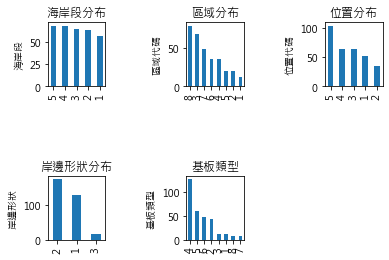

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplot2grid((3,5),(0,0))
data_train.Region.value_counts().plot(kind="bar")
plt.ylabel("海岸段")
plt.title("海岸段分布")

plt.subplot2grid((3,5),(0,2))
data_train.Seat.value_counts().plot(kind='bar')
plt.ylabel("區域代碼")
plt.title("區域分布")

plt.subplot2grid((3,5),(0,4))
data_train.Coastal_section.value_counts().plot(kind='bar')
plt.ylabel("位置代碼")
plt.title("位置分布")

plt.subplot2grid((3,5),(2,0))
data_train.Shore_shape.value_counts().plot(kind='bar')
plt.ylabel("岸邊形狀")
plt.title("岸邊形狀分布")

plt.subplot2grid((3,5),(2,2))
data_train.Substrate_type.value_counts().plot(kind="bar")
plt.title("基板類型")
plt.ylabel("基板類型")

plt.show()

Text(0, 0.5, '等級')

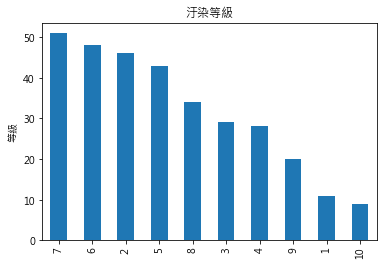

In [20]:
fig=plt.figure()
fig.set(alpha=0.2)

data_train.LEVEL.value_counts().plot(kind='bar')
plt.title("汙染等級")
plt.ylabel("等級")

Text(0.5, 1.0, '縣市分布')

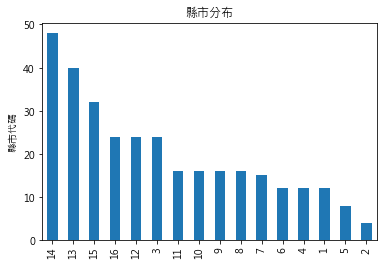

In [24]:
fig=plt.figure()
data_train.County_code.value_counts().plot(kind="bar")
plt.ylabel("縣市代碼")
plt.title("縣市分布")


<Figure size 432x288 with 0 Axes>

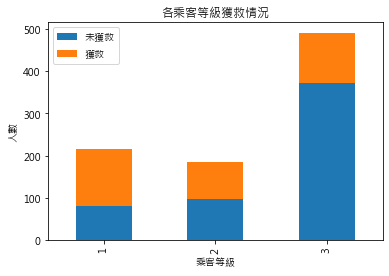

In [5]:
fig=plt.figure()
fig.set(alpha=0.2)

Survived_0=data_train.Pclass[data_train.Survived==0].value_counts()
Survived_1=data_train.Pclass[data_train.Survived==1].value_counts()
df=pd.DataFrame({'未獲救':Survived_0,'獲救':Survived_1})
df.plot(kind='bar',stacked=True)
plt.title('各乘客等級獲救情況')
plt.xlabel("乘客等級")
plt.ylabel('人數')
plt.show()

<Figure size 432x288 with 0 Axes>

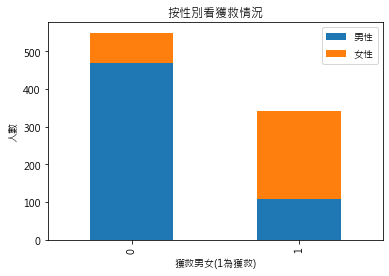

In [6]:
fig=plt.figure()
fig.set(alpha=0.2)

Survived_m=data_train.Survived[data_train.Sex=='male'].value_counts()
Survived_f=data_train.Survived[data_train.Sex=='female'].value_counts()
df=pd.DataFrame({'男性':Survived_m,'女性':Survived_f})
df.plot(kind='bar',stacked=True)
plt.title('按性別看獲救情況')
plt.xlabel('獲救男女(1為獲救)')
plt.ylabel('人數')
                               
plt.show()

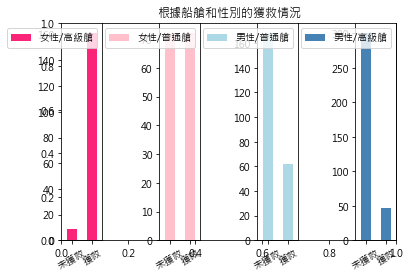

In [7]:
fig=plt.figure()
fig.set(alpha=0.65)
plt.title('根據船艙和性別的獲救情況')

ax1=fig.add_subplot(171)
data_train.Survived[data_train.Sex=='female'][data_train.Pclass!=3].value_counts().sort_index().plot(kind='bar',label="female highclass",color='#FA2479')
ax1.set_xticks([0,1])
ax1.set_xticklabels(['未獲救','獲救'],rotation=30)
ax1.legend(['女性/高級艙'],loc='best')
           
ax2=fig.add_subplot(173)
data_train.Survived[data_train.Sex=='female'][data_train.Pclass==3].value_counts().sort_index().plot(kind='bar',label="female, low class",color='pink')
ax2.set_xticklabels(['未獲救','獲救'],rotation=30)
ax2.legend(['女性/普通艙'],loc='best')
           
ax3=fig.add_subplot(175)
data_train.Survived[data_train.Sex=='male'][data_train.Pclass!=3].value_counts().sort_index().plot(kind='bar',label="male, high class",color='lightblue')
ax3.set_xticklabels(['未獲救','獲救'],rotation=30)
ax3.legend(['男性/普通艙'],loc='best')
           
ax4=fig.add_subplot(177)
data_train.Survived[data_train.Sex=='male'][data_train.Pclass==3].value_counts().sort_index().plot(kind='bar',label="male low class",color='steelblue')
ax4.set_xticklabels(['未獲救','獲救'],rotation=30)
ax4.legend(['男性/高級艙'],loc='best')          
           
plt.show()

<Figure size 432x288 with 0 Axes>

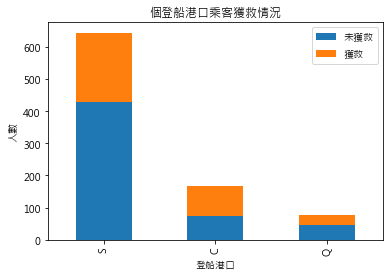

In [8]:
fig=plt.figure()
fig.set(alpha=0.2)

Survived_0=data_train.Embarked[data_train.Survived==0].value_counts()
Survived_1=data_train.Embarked[data_train.Survived==1].value_counts()
df=pd.DataFrame({'未獲救':Survived_0,'獲救':Survived_1})
df.plot(kind='bar',stacked=True)
plt.title('個登船港口乘客獲救情況')
plt.xlabel('登船港口')
plt.ylabel('人數')

plt.show()

In [9]:
gg=data_train.groupby(['SibSp','Survived'])
df=pd.DataFrame(gg['PassengerId'].count())
print(df)

gp=data_train.groupby(['Parch','Survived'])
df=pd.DataFrame(gp['PassengerId'].count())
print(df)

                PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7
                PassengerId
Parch Survived             
0     0                 445
      1                 233
1     0                  53
      1                  65
2     0                  40
      1                  40
3     0                   2
      1                   3
4     0                   4
5     0                   4
      1                   1
6     0                   1


In [10]:
data_train.Cabin.value_counts()

C23 C25 C27        4
G6                 4
B96 B98            4
F2                 3
E101               3
D                  3
C22 C26            3
F33                3
C83                2
E25                2
C78                2
B28                2
C93                2
D20                2
F G73              2
C123               2
E24                2
E44                2
D35                2
C52                2
B58 B60            2
F4                 2
C124               2
B22                2
C125               2
E8                 2
B57 B59 B63 B66    2
D17                2
D36                2
B51 B53 B55        2
                  ..
B3                 1
B38                1
A23                1
C85                1
A16                1
C101               1
B101               1
C104               1
B30                1
D9                 1
C118               1
C49                1
C7                 1
D7                 1
B94                1
C110               1
D46          

<Figure size 432x288 with 0 Axes>

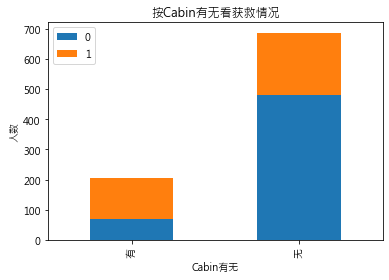

In [11]:
fig=plt.figure()
fig.set(alpha=0.2)

Survived_cabin = data_train.Survived[data_train.Cabin.notnull()].value_counts()
Survived_nocabin = data_train.Survived[data_train.Cabin.isnull()].value_counts()
df=pd.DataFrame({u'有':Survived_cabin, u'无':Survived_nocabin}).transpose()
df.plot(kind='bar', stacked=True)
plt.title(u"按Cabin有无看获救情况")
plt.xlabel(u"Cabin有无") 
plt.ylabel(u"人数")
plt.show()

In [53]:
#開始特徵處理
from sklearn.ensemble import RandomForestRegressor

def set_missing_Ers(df):
    data_df=df[['Ers','Egs','Erp','Beach','Gmbeach','Grbeach','Oil','Srs','Itz','Sll']]
    known_Ers=data_df[data_df.Ers.notnull()].values
    unknown_Ers=data_df[data_df.Ers.isnull()].values
    
    y=known_Ers[:,0]
    x=known_Ers[:,1:]
    
    rfr = RandomForestRegressor(random_state=0,n_estimators=2000,n_jobs=-1)
    rfr.fit(x,y)
    predictErs=rfr.predict(unknown_Ers[:,1:])
    
    df.loc[(df.Ers.isnull()),'Ers']=predictErs
    return df, rfr
    
data_train, rfr=set_missing_Ers(data_train)
data_train

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [88]:
dummies_County_code=pd.get_dummies(data_train.County_code,prefix='County_code')
dummies_Coastal_section =pd.get_dummies(data_train.Coastal_section ,prefix='Coastal_section ')
dummies_Region=pd.get_dummies(data_train.Region,prefix='Region')
dummies_Seat=pd.get_dummies(data_train.Seat,prefix='Seat')
dummies_Shore_shape=pd.get_dummies(data_train.Shore_shape,prefix='Shore_shape')
dummies_Substrate_type=pd.get_dummies(data_train.Substrate_type,prefix='Substrate_type')
dummies_Season=pd.get_dummies(data_train.Season,prefix='Season')

df=pd.concat([data_train,dummies_County_code,dummies_Coastal_section,dummies_Region,dummies_Seat,dummies_Shore_shape,dummies_Substrate_type],axis=1)
df.drop(['County_code','Coastal_section','Region','Seat','Shore_shape','Substrate_type','Lat','Lon','County','Season','Location','Station','Ers', 'Egs', 'Erp', 'Beach', 'Gmbeach', 'Grbeach', 'Oil', 'Srs', 'Itz',
       'Sll'],axis=1,inplace=True)
df.head()

,Plastic bottle container,Disposable cup / straw / tableware,Plastic bag,Foam material,Float,Fishing nets and ropes,Fishing equipment,Cigarette and lighter,Glass jar,Metal,...,Shore_shape_2,Shore_shape_3,Substrate_type_1,Substrate_type_2,Substrate_type_3,Substrate_type_4,Substrate_type_5,Substrate_type_6,Substrate_type_7,Substrate_type_8
0,1,0,1,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [89]:
df.columns

Index(['Plastic bottle container', 'Disposable cup / straw / tableware',
       'Plastic bag', 'Foam material', 'Float', 'Fishing nets and ropes',
       'Fishing equipment', 'Cigarette and lighter', 'Glass jar', 'Metal',
       'Paper', 'Others', 'LEVEL', 'County_code_1', 'County_code_2',
       'County_code_3', 'County_code_4', 'County_code_5', 'County_code_6',
       'County_code_7', 'County_code_8', 'County_code_9', 'County_code_10',
       'County_code_11', 'County_code_12', 'County_code_13', 'County_code_14',
       'County_code_15', 'County_code_16', 'Coastal_section _1',
       'Coastal_section _2', 'Coastal_section _3', 'Coastal_section _4',
       'Coastal_section _5', 'Region_1', 'Region_2', 'Region_3', 'Region_4',
       'Region_5', 'Seat_1', 'Seat_2', 'Seat_3', 'Seat_4', 'Seat_5', 'Seat_6',
       'Seat_7', 'Seat_8', 'Shore_shape_1', 'Shore_shape_2', 'Shore_shape_3',
       'Substrate_type_1', 'Substrate_type_2', 'Substrate_type_3',
       'Substrate_type_4', 'Substrate_ty

In [90]:
df=df[['LEVEL','Plastic bottle container', 'Disposable cup / straw / tableware',
       'Plastic bag', 'Foam material', 'Float', 'Fishing nets and ropes',
       'Fishing equipment', 'Cigarette and lighter', 'Glass jar', 'Metal',
       'Paper', 'Others', 'County_code_1', 'County_code_2',
       'County_code_3', 'County_code_4', 'County_code_5', 'County_code_6',
       'County_code_7', 'County_code_8', 'County_code_9', 'County_code_10',
       'County_code_11', 'County_code_12', 'County_code_13', 'County_code_14',
       'County_code_15', 'County_code_16', 'Coastal_section _1',
       'Coastal_section _2', 'Coastal_section _3', 'Coastal_section _4',
       'Coastal_section _5', 'Region_1', 'Region_2', 'Region_3', 'Region_4',
       'Region_5', 'Seat_1', 'Seat_2', 'Seat_3', 'Seat_4', 'Seat_5', 'Seat_6',
       'Seat_7', 'Seat_8', 'Shore_shape_1', 'Shore_shape_2', 'Shore_shape_3',
       'Substrate_type_1', 'Substrate_type_2', 'Substrate_type_3',
       'Substrate_type_4', 'Substrate_type_5', 'Substrate_type_6',
       'Substrate_type_7', 'Substrate_type_8']]
df.head(10)

,LEVEL,Plastic bottle container,Disposable cup / straw / tableware,Plastic bag,Foam material,Float,Fishing nets and ropes,Fishing equipment,Cigarette and lighter,Glass jar,...,Shore_shape_2,Shore_shape_3,Substrate_type_1,Substrate_type_2,Substrate_type_3,Substrate_type_4,Substrate_type_5,Substrate_type_6,Substrate_type_7,Substrate_type_8
0,2,1,0,1,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
1,5,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,2,1,0,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,5,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,5,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,7,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,2,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8,5,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
9,6,1,0,0,1,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [93]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout

y = df.iloc[:, 0]
x = df.iloc[:, 1:]

model = Sequential()
model.add(Dense(128, activation='relu', input_dim=56))
model.add(Dense(units=10, activation='softmax'))
model.add(Dropout(0.1))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam')
model.fit(x, y, epochs=100, batch_size=10, verbose=1)

(319, 57)

In [78]:
data_test = pd.read_csv("test.csv")
data_test.rename(columns={
"縣市":'County_code'
,'海岸段':'Coastal_section'
,'Shore shape':'Shore_shape'
,'Substrate type':'Substrate_type'
,'1暴露岩岸':'Ers'
,'2暴露人造結構物':'Egs'
,'3暴露岩盤':'Erp'
,'4沙灘':'Beach'
,'5砂礫混合灘':'Gmbeach'
,'6礫石灘':'Grbeach'
,'7開闊潮間帶':'Oil'
,'8遮蔽岩岸':'Srs'
,'9遮蔽潮間帶':'Itz'
,'10遮蔽濕地':'Sll'},inplace=True)

dummies_County_code1=pd.get_dummies(data_test.County_code,prefix='County_code')
dummies_Coastal_section1 =pd.get_dummies(data_test.Coastal_section ,prefix='Coastal_section ')
dummies_Region1=pd.get_dummies(data_test.Region,prefix='Region')
dummies_Seat1=pd.get_dummies(data_test.Seat,prefix='Seat')
dummies_Shore_shape1=pd.get_dummies(data_test.Shore_shape,prefix='Shore_shape')
dummies_Substrate_type1=pd.get_dummies(data_test.Substrate_type,prefix='Substrate_type')
dummies_Season1=pd.get_dummies(data_test.Season,prefix='Season')

df1=pd.concat([data_test,dummies_County_code1,dummies_Coastal_section1,dummies_Region1,dummies_Seat1,dummies_Shore_shape1,dummies_Substrate_type1],axis=1)
df1.drop(['County_code','Coastal_section','Region','Seat','Shore_shape','Substrate_type','Lat','Lon','County','Season','Location','Station','Ers', 'Egs', 'Erp', 'Beach', 'Gmbeach', 'Grbeach', 'Oil', 'Srs', 'Itz',
       'Sll'],axis=1,inplace=True)

df1=df1[['Plastic bottle container', 'Disposable cup / straw / tableware',
       'Plastic bag', 'Foam material', 'Float', 'Fishing nets and ropes',
       'Fishing equipment', 'Cigarette and lighter', 'Glass jar', 'Metal',
       'Paper', 'Others', 'County_code_1', 'County_code_2',
       'County_code_3', 'County_code_4', 'County_code_5', 'County_code_6',
       'County_code_7', 'County_code_8', 'County_code_9', 'County_code_10',
       'County_code_11', 'County_code_12', 'County_code_13', 'County_code_14',
       'County_code_15', 'County_code_16', 'Coastal_section _1',
       'Coastal_section _2', 'Coastal_section _3', 'Coastal_section _4',
       'Coastal_section _5', 'Region_1', 'Region_2', 'Region_3', 'Region_4',
       'Region_5', 'Seat_1', 'Seat_2', 'Seat_3', 'Seat_4', 'Seat_5', 'Seat_6',
       'Seat_7', 'Seat_8', 'Shore_shape_1', 'Shore_shape_2', 'Shore_shape_3',
       'Substrate_type_1', 'Substrate_type_2', 'Substrate_type_3',
       'Substrate_type_4', 'Substrate_type_5', 'Substrate_type_6',
       'Substrate_type_7', 'Substrate_type_8']]

x = df1.iloc[:, 1:]
yt = model.predict(x)
plt.plot(yt)

ParserError: Error tokenizing data. C error: Expected 34 fields in line 41, saw 35


In [14]:
import sklearn.preprocessing as preprocessing
scaler=preprocessing.StandardScaler()

age_scale_param=scaler.fit(df.Age.values.reshape(-1,1))
df['Age_scaled']=scaler.fit_transform(df.Age.values.reshape(-1,1),age_scale_param)

Fare_scale_param=scaler.fit(df.Fare.values.reshape(-1,1))
df['Fare_scaled']=scaler.fit_transform(df.Fare.values.reshape(-1,1),Fare_scale_param)

df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Age_scaled,Fare_scaled
0,1,0,22.0,1,0,7.2500,1,0,0,0,1,0,0,1,0,1,-0.561380,-0.502445
1,2,1,38.0,1,0,71.2833,0,1,1,0,0,1,0,0,1,0,0.613171,0.786845
2,3,1,26.0,0,0,7.9250,1,0,0,0,1,0,0,1,1,0,-0.267742,-0.488854
3,4,1,35.0,1,0,53.1000,0,1,1,0,0,0,0,1,1,0,0.392942,0.420730
4,5,0,35.0,0,0,8.0500,1,0,0,0,1,0,0,1,0,1,0.392942,-0.486337


In [15]:
from sklearn import linear_model

# 用正则取出我们要的属性值
train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
train_np = train_df.values

# y即第0列：Survival结果
y = train_np[:, 0]

# X即第1列及以后：特征属性值
X = train_np[:, 1:]

# fit到LogisticRegression之中
clf = linear_model.LogisticRegression(solver='liblinear',C=1.0, penalty='l1', tol=1e-6)
clf.fit(X, y)

clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=1e-06, verbose=0,
                   warm_start=False)

In [16]:
data_test=pd.read_csv('test.csv')
data_test.loc[(data_test.Fare.isnull()),'Fare']=0

tmp_df=data_test[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
null_age=tmp_df[data_test.Age.isnull()].values
X=null_age[:,1:]
predictedAges=rfr.predict(X)
data_test.loc[(data_test.Age.isnull()),'Age']=predictedAges
data_test=set_Cabin_type(data_test)

dummies_Cabin = pd.get_dummies(data_test['Cabin'], prefix= 'Cabin')
dummies_Embarked = pd.get_dummies(data_test['Embarked'], prefix= 'Embarked')
dummies_Sex = pd.get_dummies(data_test['Sex'], prefix= 'Sex')
dummies_Pclass = pd.get_dummies(data_test['Pclass'], prefix= 'Pclass')

df_test = pd.concat([data_test, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df_test.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df_test['Age_scaled'] = scaler.fit_transform(df_test['Age'].values.reshape(-1,1), age_scale_param)
df_test['Fare_scaled'] = scaler.fit_transform(df_test['Fare'].values.reshape(-1,1), Fare_scale_param)
df_test.head(20)

,PassengerId,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,892,34.500000,0,0,7.8292,1,0,0,1,0,0,1,0,0,1,0.307521,-0.496637
1,893,47.000000,1,0,7.0000,1,0,0,0,1,1,0,0,0,1,1.256241,-0.511497
2,894,62.000000,0,0,9.6875,1,0,0,1,0,0,1,0,1,0,2.394706,-0.463335
3,895,27.000000,0,0,8.6625,1,0,0,0,1,0,1,0,0,1,-0.261711,-0.481704
4,896,22.000000,1,1,12.2875,1,0,0,0,1,1,0,0,0,1,-0.641199,-0.416740
5,897,14.000000,0,0,9.2250,1,0,0,0,1,0,1,0,0,1,-1.248380,-0.471623
6,898,30.000000,0,0,7.6292,1,0,0,1,0,1,0,0,0,1,-0.034018,-0.500221
7,899,26.000000,1,1,29.0000,1,0,0,0,1,0,1,0,1,0,-0.337609,-0.117238
8,900,18.000000,0,0,7.2292,1,0,1,0,0,1,0,0,0,1,-0.944790,-0.507390
9,901,21.000000,2,0,24.1500,1,0,0,0,1,0,1,0,0,1,-0.717097,-0.204154


In [17]:
test=df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions=clf.predict(test)
result=pd.DataFrame({'PassengerId':data_test['PassengerId'].values,'Survived':predictions.astype(np.int32)})
result.to_csv("logistic_regression_predictions.csv", index=False)
pd.read_csv("logistic_regression_predictions.csv").head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,0
4,896,0


In [18]:
#強化版
pd.DataFrame({'coiumns':list(train_df.columns)[1:],'coef':list(clf.coef_.T)})

,coiumns,coef
0,SibSp,[-0.3442356695747473]
1,Parch,[-0.10491587051500857]
2,Cabin_No,[0.0]
3,Cabin_Yes,[0.9021080338314572]
4,Pclass_1,[0.3411582227860169]
5,Pclass_2,[0.0]
6,Pclass_3,[-1.194130688810943]
7,Embarked_C,[0.0]
8,Embarked_Q,[0.0]
9,Embarked_S,[-0.4172643925518145]


In [26]:
from sklearn.model_selection import cross_val_score,train_test_split
clf=linear_model.LogisticRegression(solver='liblinear',C=1.0,penalty='l1',tol=1e-6)
train_test=df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
all_data = train_test.values
x=all_data[:,1:]
y=all_data[:,0]
print(cross_val_score(clf,x,y,cv=5))

[0.81564246 0.81564246 0.78651685 0.78651685 0.81355932]


In [30]:
# 分割数据，按照 训练数据:cv数据 = 7:3的比例
# split_train, split_cv = cross_validation.train_test_split(df, test_size=0.3, random_state=0)
split_train, split_cv = train_test_split(df, test_size=0.3, random_state=42)

train_df = split_train.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
# 生成模型
clf = linear_model.LogisticRegression(solver='liblinear',C=1.0, penalty='l1', tol=1e-6)
clf.fit(train_df.values[:,1:], train_df.values[:,0])

# 对cross validation数据进行预测

cv_df = split_cv.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = clf.predict(cv_df.values[:,1:])

origin_data_train = pd.read_csv("train.csv")
bad_cases = origin_data_train.loc[origin_data_train['PassengerId'].isin(split_cv[predictions != cv_df.values[:,0]]['PassengerId'].values)]
bad_cases.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
23,24,1,1,"Sloper, Mr. William Thompson",male,28.00,0,0,113788,35.5000,A6,S
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.00,1,5,347077,31.3875,NaN,S
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.00,1,0,349237,17.8000,NaN,S
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
81,82,1,3,"Sheerlinck, Mr. Jan Baptist",male,29.00,0,0,345779,9.5000,NaN,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.00,0,1,PC 17558,247.5208,B58 B60,C
139,140,0,1,"Giglio, Mr. Victor",male,24.00,0,0,PC 17593,79.2000,B86,C
165,166,1,3,"Goldsmith, Master. Frank John William ""Frankie""",male,9.00,0,2,363291,20.5250,NaN,S


In [38]:
from sklearn.ensemble import BaggingRegressor

train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass.*|Mother|Child|Family|Title')
train_np = train_df.values

# y即Survival结果
y = train_np[:, 0]

# X即特征属性值
x = train_np[:, 1:]

# fit到BaggingRegressor之中
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)

bagging_clf=BaggingRegressor(clf,n_estimators=20,max_samples=0.8,max_features=1.0,bootstrap=True,bootstrap_features=False,n_jobs=-1)
bagging_clf.fit(x,y)
test=df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass.*|Mother|Child|Family|Title')
predictions=bagging_clf.predict(test)
result=pd.DataFrame({'PassengerId':data_test['PassengerId'].values, 'Survived':predictions.astype(np.int32)})
result.to_csv('logistic_regression_bagging_predictions.csv',index=False)
pd.read_csv('logistic_regression_bagging_predictions.csv')

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,1
8,900,0
9,901,0
